In [1]:
# This program was is a test platform for training a non linear model on N-Dimensional
# Data to be ported to the propublica data. It can be run as is, to model a 3-Dimensional
# sine wave.

In [2]:
import os
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from keras import layers, models
from keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from mpl_toolkits import mplot3d


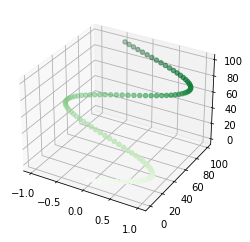

In [3]:
# generate dummy data
import random

x = []
y = []
z = []
time = np.arange(0, 100, 1)
for i in range(100):
    x.append(np.sin(i/10))
    y.append(i)
    z1 = i
    z.append(z1)

# plt.scatter(x, y)
# plt.scatter([50], [50], color='red')
# plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens')

n_att = 1

x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

    

In [4]:
x_train = []
for i in range(len(x)):
    x_train.append([x[i], z[i]])
x_train = np.asarray(x_train)
x_train.shape

(100, 2)

In [5]:
# MODEL IMPLEMENTATION

# DNN generally only have a single hidden layer, as far as n_nuerons usually you want some
# number between the input and output sizes, one rule of thumb is n_samples / (a *(n_in + n_out))
# where 2 <= a <= 10, gunna use that and play with it as needed, 16's (for n_in=32, n_out=1) a good 
# starting point. Also think treating this as a regression problem makes sense since the decile 
# scores are not categorical and are very much a scale. (originally were thinking softmax so output
# activation is now linear)

n_epochs = 500 
n_att = 2
n_batch = n_att * 20

# define model 
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_dim=n_att))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [6]:
# MODEL TRAINING 1

# train model
# starting with e50 b32 as a jumping off point
history = model.fit(x_train, y, epochs=n_epochs, batch_size=n_batch, verbose=2, validation_split=0.2)

Epoch 1/500
2/2 - 13s - loss: 1465.8356 - mse: 1465.8356 - mae: 33.1567 - val_loss: 1696.2571 - val_mse: 1696.2571 - val_mae: 41.0948
Epoch 2/500
2/2 - 0s - loss: 279.8362 - mse: 279.8362 - mae: 13.7952 - val_loss: 3.6357 - val_mse: 3.6357 - val_mae: 1.8872
Epoch 3/500
2/2 - 0s - loss: 42.7024 - mse: 42.7024 - mae: 4.4394 - val_loss: 872.3507 - val_mse: 872.3507 - val_mae: 29.4879
Epoch 4/500
2/2 - 0s - loss: 258.0998 - mse: 258.0998 - mae: 13.9748 - val_loss: 836.6152 - val_mse: 836.6152 - val_mae: 28.8778
Epoch 5/500
2/2 - 0s - loss: 165.8676 - mse: 165.8676 - mae: 11.2228 - val_loss: 147.0401 - val_mse: 147.0401 - val_mae: 12.1113
Epoch 6/500
2/2 - 0s - loss: 21.5678 - mse: 21.5678 - mae: 3.4413 - val_loss: 38.0260 - val_mse: 38.0260 - val_mae: 6.1419
Epoch 7/500
2/2 - 0s - loss: 24.0264 - mse: 24.0264 - mae: 3.9350 - val_loss: 268.2323 - val_mse: 268.2323 - val_mae: 16.3355
Epoch 8/500
2/2 - 0s - loss: 79.1491 - mse: 79.1491 - mae: 7.6067 - val_loss: 357.7727 - val_mse: 357.7727 - 

In [7]:
temp = np.asarray([10, 20])
print(temp.shape)
temp = np.expand_dims(temp, axis=0)
temp

(2,)


array([[10, 20]])

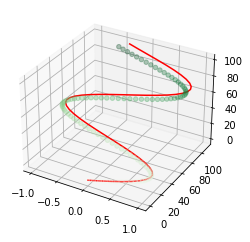

In [8]:
reg_x = []
reg_y = []
reg_z = []

for i in range(50):
    n = i * 2
    reg_x.append(np.sin(n/10))
    reg_z.append(z[n])
    model_input = np.asarray([n, z[n]])
    model_input = np.expand_dims(model_input, axis=0)
    reg_y.append(model.predict(model_input)[0][0])



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens', alpha=0.3)
ax.plot3D(reg_x, reg_y, reg_z, 'red')

